In [3]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

#Initialising the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

#Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/soltan/Desktop/Jupyter ML/dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/soltan/Desktop/Jupyter ML/dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

history=classifier.fit(training_set,
steps_per_epoch = len(training_set),
epochs = 50,
validation_data = test_set,
validation_steps = len(test_set))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/50
250/250 [==============================] - 69s 269ms/step - loss: 0.6679 - accuracy: 0.5900 - val_loss: 0.6192 - val_accuracy: 0.6530
Epoch 2/50
250/250 [==============================] - 55s 218ms/step - loss: 0.5912 - accuracy: 0.6823 - val_loss: 0.5494 - val_accuracy: 0.7245
Epoch 3/50
250/250 [==============================] - 55s 221ms/step - loss: 0.5472 - accuracy: 0.7196 - val_loss: 0.5618 - val_accuracy: 0.7295
Epoch 4/50
250/250 [==============================] - 56s 225ms/step - loss: 0.5210 - accuracy: 0.7408 - val_loss: 0.5084 - val_accuracy: 0.7595
Epoch 5/50
250/250 [==============================] - 56s 223ms/step - loss: 0.4999 - accuracy: 0.7552 - val_loss: 0.4968 - val_accuracy: 0.7575
Epoch 6/50
250/250 [==============================] - 55s 221ms/step - loss: 0.4880 - accuracy: 0.7632 - val_loss: 0.4756 - val_accuracy: 0.7735
Epoch 7/50
250/250 [==========================

In [8]:
#Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image_path = 'C:/Users/soltan/Desktop/Jupyter ML/dataset/single_prediction/cat_or_dog_2.png'
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image/255.0 # Normalizing the pixel values
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 50ms/step
cat


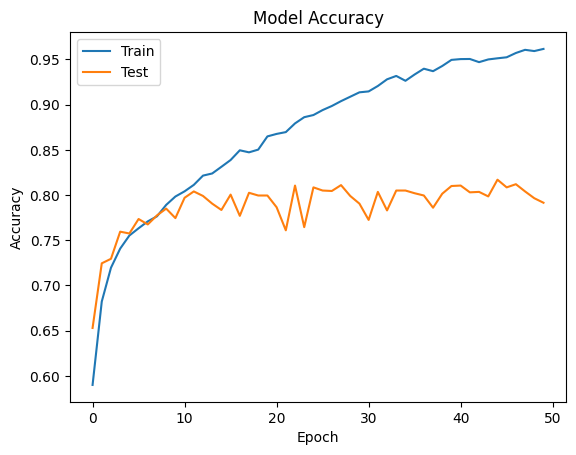

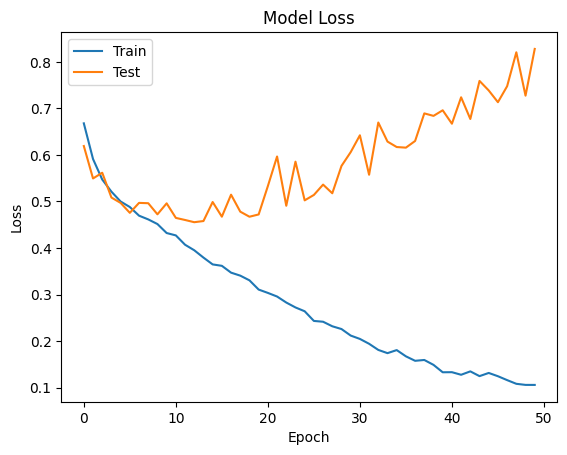

In [9]:
import matplotlib.pyplot as plt


# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
